### Evaluation notebook for trained and saved models

In [3]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=''
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, cVAESolver , BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from pathlib import Path
import os, glob
import matplotlib.pyplot as plt
from mapsgan.utils import smooth_data

env: CUDA_VISIBLE_DEVICES=''


In [4]:
torch.cuda.is_available()

False

### Set these manually according to the script

In [5]:
# can directly copy-paste from the script
mode = 'clr'
fileprefix = '/hyp/hyp'
lr_gen = 1e-3
lr_dis = 1e-3

In [20]:
root_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
filesearch = root_path + '/models' + fileprefix + '*5000*' # can change here acc to saved epoch
filelist = glob.glob(filesearch)
filelist

['/home/yy/ADL4CV/mapsgan/models/hyp/hyp_clr_1_20190201-125912_epoch_5000',
 '/home/yy/ADL4CV/mapsgan/models/hyp/hyp_clr_0_20190201-121031_epoch_5000',
 '/home/yy/ADL4CV/mapsgan/models/hyp/hyp_clr_2_20190201-134820_epoch_5000',
 '/home/yy/ADL4CV/mapsgan/models/hyp/hyp_cvae_1_20190201-152751_epoch_5000']

In [45]:
filename=filelist[0]
filename

'/home/yy/ADL4CV/mapsgan/models/hyp/hyp_clr_1_20190201-125912_epoch_5000'

### Initializing dataloader, models, solver

In [48]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.train_dir,
                                  shuffle=True)
_ , testloader = data_loader(in_len=8, out_len=12, batch_size=1, num_workers=1, path=experiment.test_dir,
                                  shuffle=False)

In [50]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode=mode)
discriminator = ToyDiscriminator()

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
if mode == 'clr':
    solver = cLRSolver(generator, discriminator, 
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})
elif mode == 'cvae':
    solver = cVAESolver(generator, discriminator, 
                optims_args={'generator': {'lr': lr_gen}, 'discriminator': {'lr': lr_dis}})

### ADE, FDE, collusion?

In [42]:
from mapsgan.losses import displacement_error, final_displacement_error

### Looking at losses

In [ ]:
solver.load_checkpoint(filename)

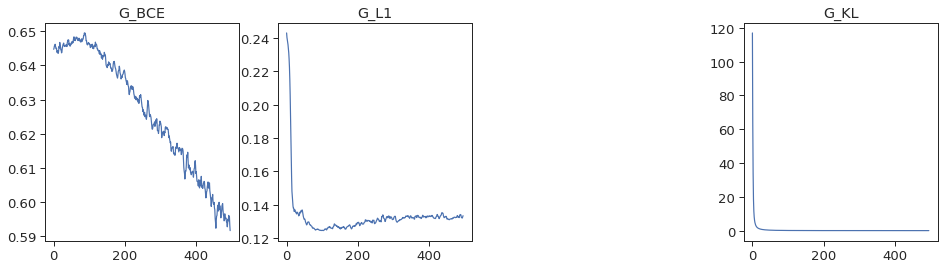

In [46]:
vis = Visualization()
vis.loss_val(solver.train_loss_history['validation']['generator'])

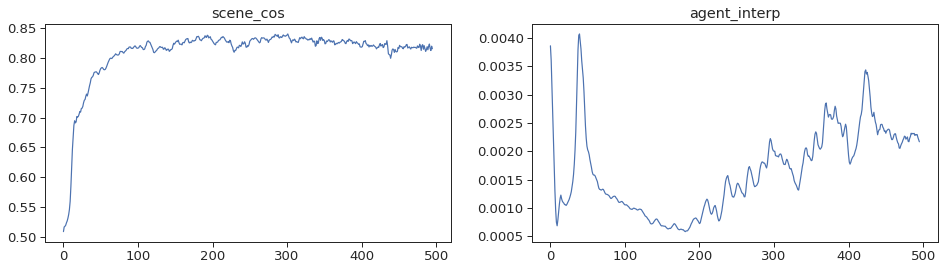

In [37]:
vis.loss_val(solver.train_loss_history['validation']['diversity'])

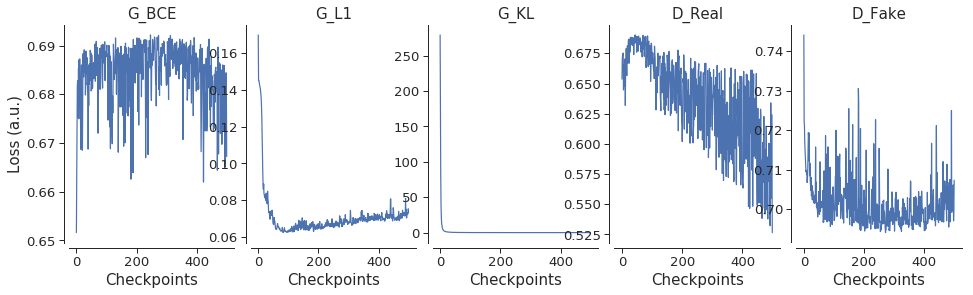

In [38]:
vis.loss(solver.train_loss_history)

### Looking at predictions

In [39]:
output = solver.test(testloader, load_checkpoint_from=filename) #can also use trainloader for overfit

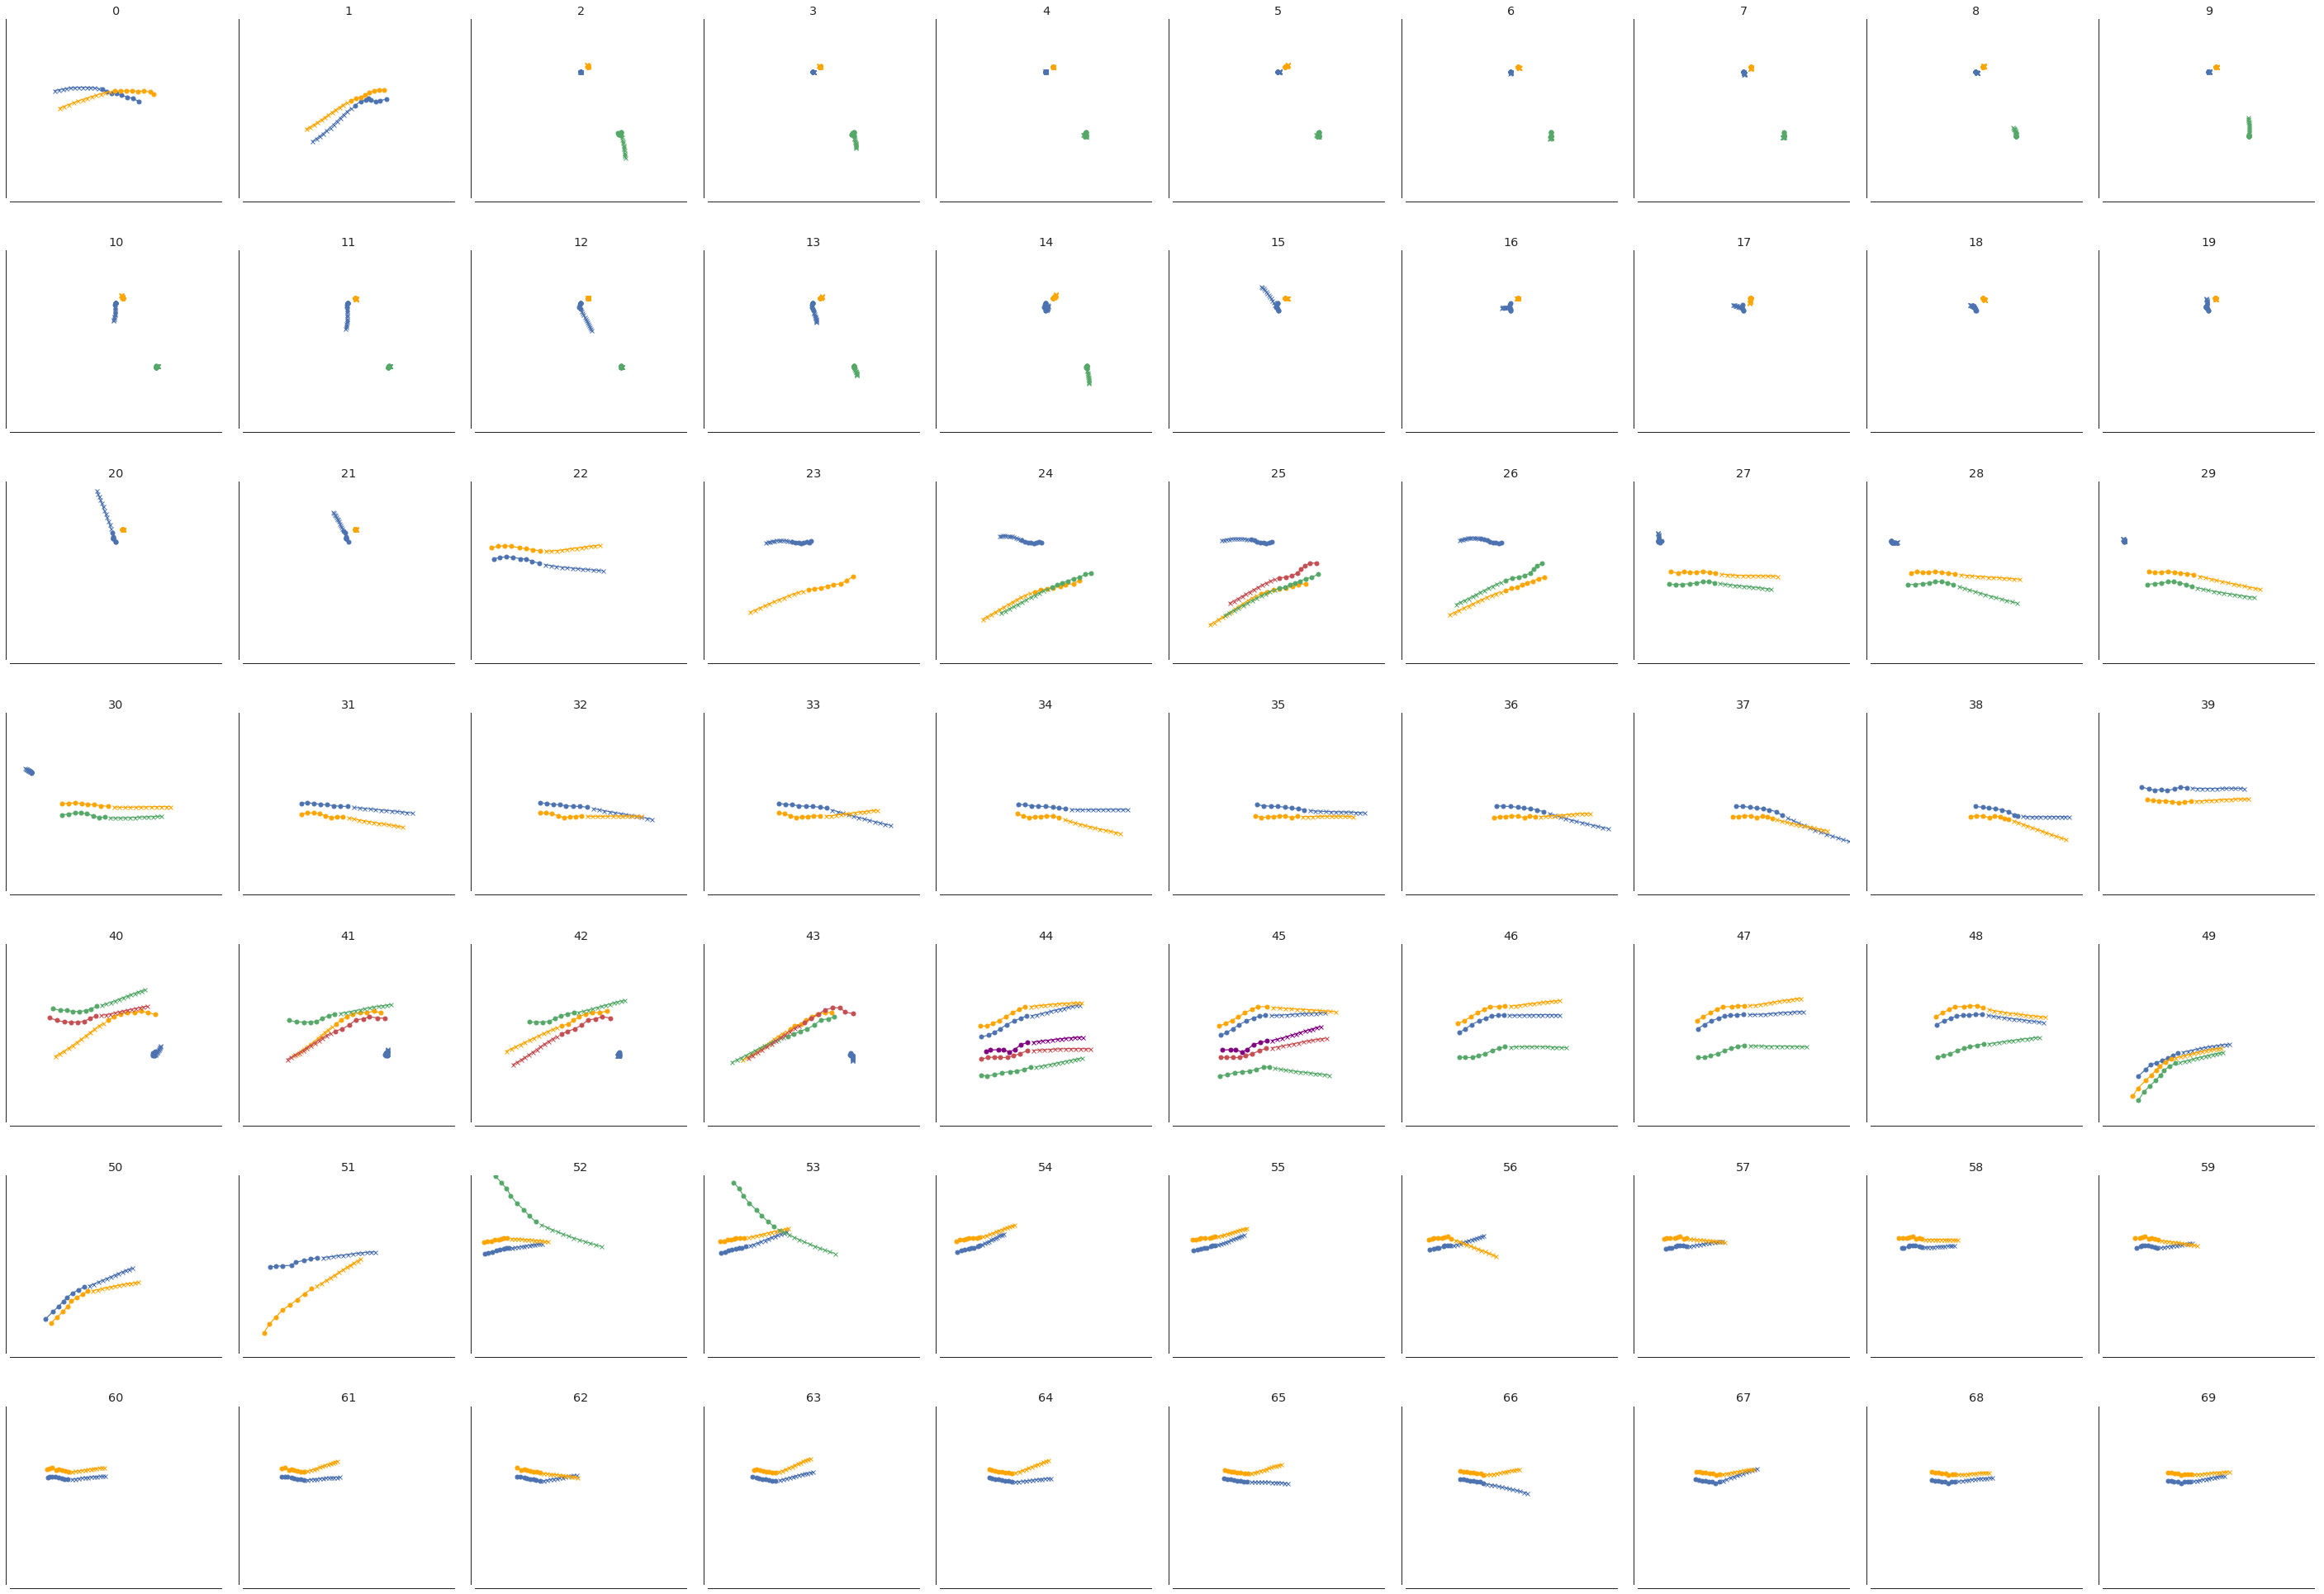

In [40]:
vis = Visualization()
ll = vis.trajectories(output, scenes=None)

### Interpolation

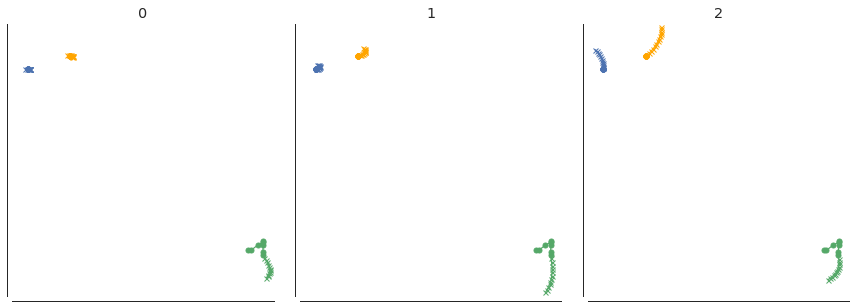

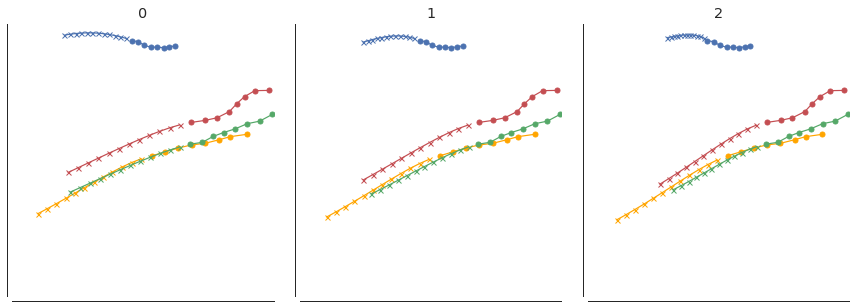

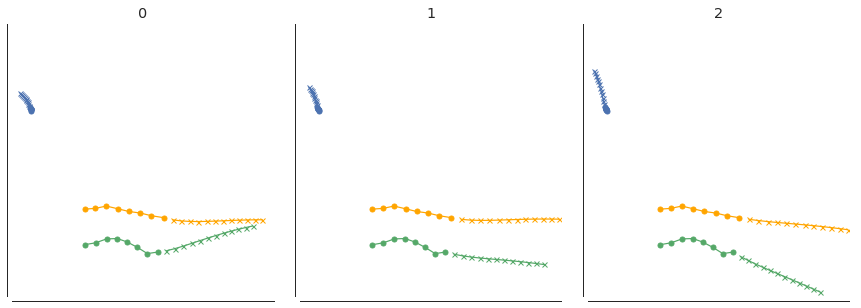

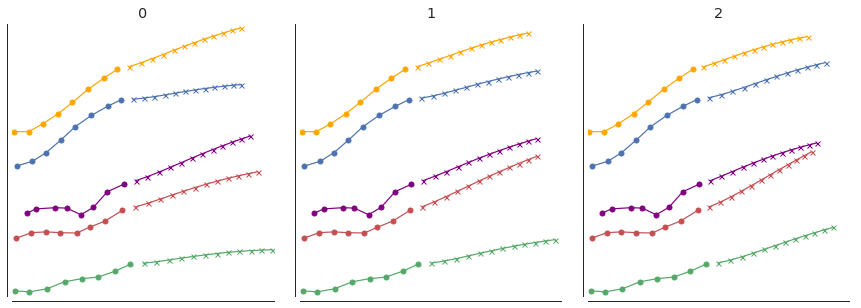

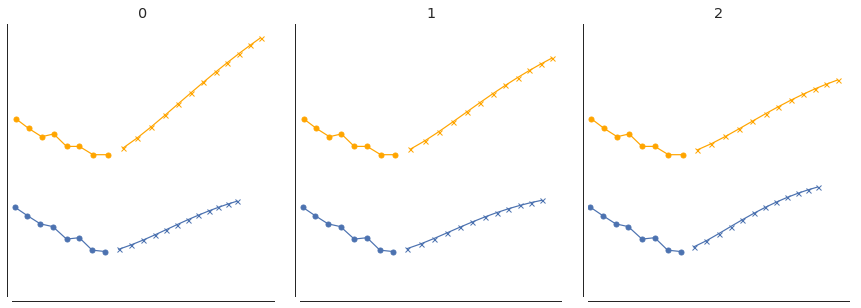

In [19]:
for s in [3,25,30,44,65]:
    out = solver.interpolate(testloader, scene=s, seed=10, stepsize=0.8)
    vis.trajectories(out, scenes = None)
    plt.show()